## WINE QUALITY 


In [1]:
import pandas as pd

In [4]:
wine=pd.read_csv("winequality-red.csv")

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## TRAINING AND TESTING

In [8]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wine, test_size=0.2,random_state=42)
print({len(test_set)})
print({len(train_set)})

{320}
{1279}


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
stratify=wine['alcohol']


In [12]:
wine['alcohol']

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

In [13]:
wine=train_set.copy()

In [14]:
corr_matrix = wine.corr()

array([[<AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='volatile acidity'>],
       [<AxesSubplot:xlabel='volatile acidity', ylabel='citric acid'>,
        <AxesSubplot:xlabel='citric acid', ylabel='citric acid'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='citric acid'>,
        <AxesSubplot:xlabel='pH', ylabel='citric acid'>],
       [<AxesSubplot:xlabel='volatile acidity', ylabel='residual sugar'>,
        <AxesSubplot:xlabel='citric acid', ylabel='residual sugar'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='residual sugar'>,
        <AxesSubplot:xlabel='pH', ylabel='residual sugar'>],
       [<AxesSubplot:xlabel='volatile acidity', ylabel='pH'>,
        <AxesSubplot:xlabel='citric acid', ylabel='pH'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='pH'

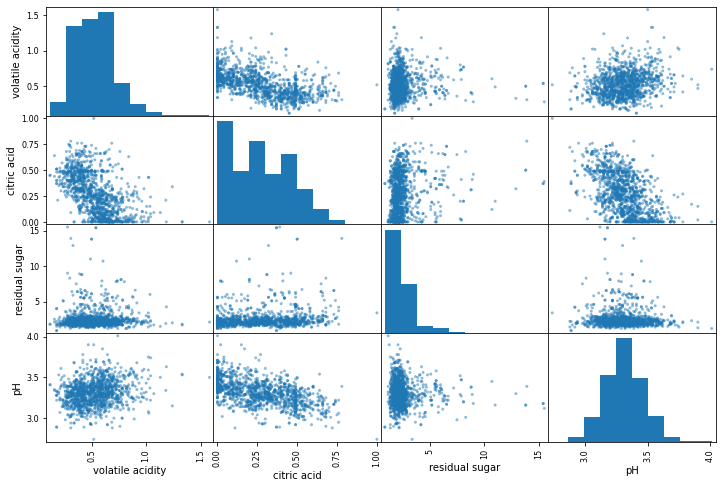

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["volatile acidity", "citric acid", "residual sugar", "pH"]
scatter_matrix(wine[attributes], figsize =(12,8))

## ATTRIBUTE COMBINATIONS

In [17]:
wine["densityph"]=wine['density']/wine['pH']

In [18]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,densityph
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6,0.287414
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6,0.304985
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6,0.302485
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5,0.300283
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5,0.296439


<AxesSubplot:xlabel='densityph', ylabel='citric acid'>

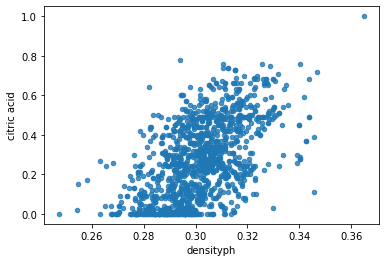

In [19]:
wine.plot(kind="scatter", x="densityph", y="citric acid", alpha=0.8)

In [20]:
corr_matrix = wine.corr()
corr_matrix['citric acid'].sort_values(ascending=False)

citric acid             1.000000
fixed acidity           0.669197
densityph               0.549737
density                 0.367675
sulphates               0.315754
chlorides               0.221817
quality                 0.216115
residual sugar          0.152596
alcohol                 0.106708
total sulfur dioxide    0.034224
free sulfur dioxide    -0.067874
pH                     -0.540161
volatile acidity       -0.545491
Name: citric acid, dtype: float64

In [21]:
wine = train_set.drop("citric acid", axis=1)
wine_labels = train_set["citric acid"].copy()

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(wine)

SimpleImputer(strategy='median')

In [23]:
imputer.statistics_

array([ 7.9   ,  0.52  ,  2.2   ,  0.08  , 14.    , 38.    ,  0.9968,
        3.31  ,  0.62  , 10.2   ,  6.    ])

## CREATING PIPELINE

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy="median")),
    ('std_scaler' , StandardScaler()),
])

In [25]:
wine_num_tr = my_pipeline.fit_transform(wine)

## MODEL SELECTION

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
# model = DecisionTreeRegressor()
#model=RandomForestRegressor()
model.fit(wine_num_tr, wine_labels)

LinearRegression()

In [27]:
some_data = wine.iloc[:5]

In [28]:
some_labels = wine_labels.iloc[:5]

In [29]:
prepared_data = my_pipeline.transform(some_data)

In [30]:
model.predict(prepared_data)

array([0.28272226, 0.38922735, 0.47233093, 0.16148951, 0.07000492])

In [31]:
list(some_labels)

[0.31, 0.4, 0.47, 0.26, 0.15]

## MODEL EVALUATION

In [32]:
from sklearn.metrics import mean_squared_error
wine_predictions = model.predict(wine_num_tr)
lin_mse = mean_squared_error(wine_labels , wine_predictions)
lin_rmse = np.sqrt(lin_mse)

In [33]:
lin_mse

0.011880080404506888

## CROSS VALIDATION

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,wine_num_tr, wine_labels, scoring="neg_mean_squared_error" , cv=10)
rmse_scores = np.sqrt(-scores)

In [35]:
rmse_scores

array([0.10022791, 0.10512308, 0.10565842, 0.11086978, 0.12283459,
       0.11138875, 0.11024548, 0.10470275, 0.11020553, 0.11681448])

In [36]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ",scores.std())

In [37]:
print_scores(rmse_scores)


Scores: [0.10022791 0.10512308 0.10565842 0.11086978 0.12283459 0.11138875
 0.11024548 0.10470275 0.11020553 0.11681448]
Mean:  0.10980707647317522
Standard deviation:  0.006162528636145824


In [38]:
from joblib import dump,load
dump(model, 'WINE.joblib')

['WINE.joblib']

## TESTING

In [39]:
X_test = test_set.drop("citric acid", axis=1)
Y_test = test_set["citric acid"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[ 2.26073051e-01  2.72672926e-01  3.41447383e-01  2.61708225e-01
  1.66206009e-01  2.02472563e-01  3.26986411e-01  4.05832350e-02
  2.75667998e-01  3.04506450e-02  4.53469478e-01  2.09714889e-02
  1.32711273e-01  9.94016518e-02  2.78783805e-01  4.16963077e-01
  1.43778372e-01  4.30030281e-01  4.59648168e-01  1.85529269e-01
  1.20657147e-01  1.91175400e-01  9.44199237e-02  1.99832988e-01
  1.35388736e-01  1.52162284e-01  6.95023451e-01  1.29658787e-01
  2.11925269e-01  6.39663492e-01  1.80895058e-01  2.21873206e-01
  3.43080218e-01  2.69739946e-01  1.11419220e-01  2.39365074e-01
  1.75753999e-01  3.67780673e-02  4.38882664e-01  2.78358915e-01
  4.78856264e-01  3.19962785e-01  4.64394630e-01  2.92365824e-01
  5.12719514e-01  1.44016729e-01  5.15980434e-01  5.22976494e-01
  3.32058326e-02  8.72913058e-02  3.15404386e-01  5.77186979e-01
  1.31675263e-01  1.24055707e-01  1.20184417e-01  2.57301637e-01
  1.38635501e-01  1.67134458e-01  2.15978412e-01  5.25515143e-02
  2.76408738e-01  4.40961

In [40]:
final_rmse

0.11474539235211893